#### Package and dataset imports

In [1]:
# Basic imports
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [2]:
# Bring in iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target_names[iris.target]

#### Exploratory data analysis (EDA)

In [3]:
# Show samples from dataset
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Show descriptive stats
data.describe().round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [5]:
# Show number of rows per species
data['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [6]:
# Check for nulls
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

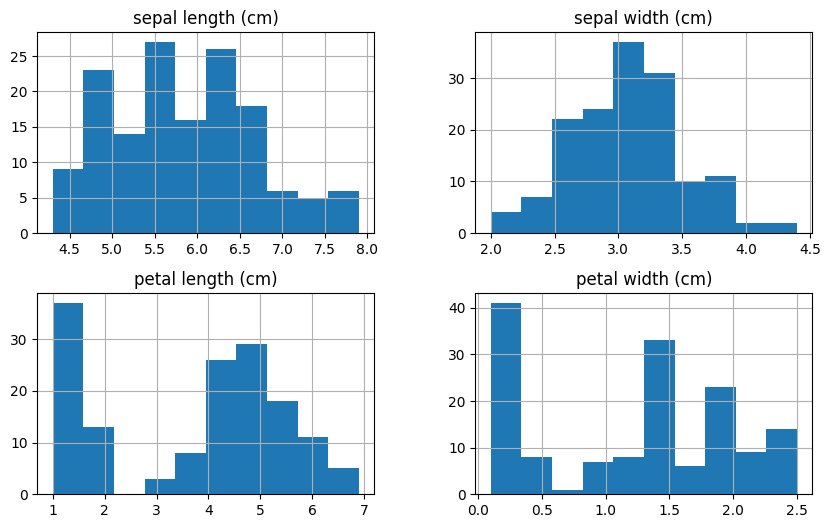

In [7]:
# Histograms of numerical features
data.hist(figsize=(10, 6))

#### Feature engineering

In [8]:
# Create features related to petal and sepal areas
data['petal_area'] = data['petal length (cm)'] * data['petal width (cm)']
data['sepal_area'] = data['sepal length (cm)'] * data['sepal width (cm)']

# Create feature related to ratios of length to width
data['petal_length_to_width'] = data['petal length (cm)'] / data['petal width (cm)']
data['sepal_length_to_width'] = data['sepal length (cm)'] / data['sepal width (cm)']

<Axes: >

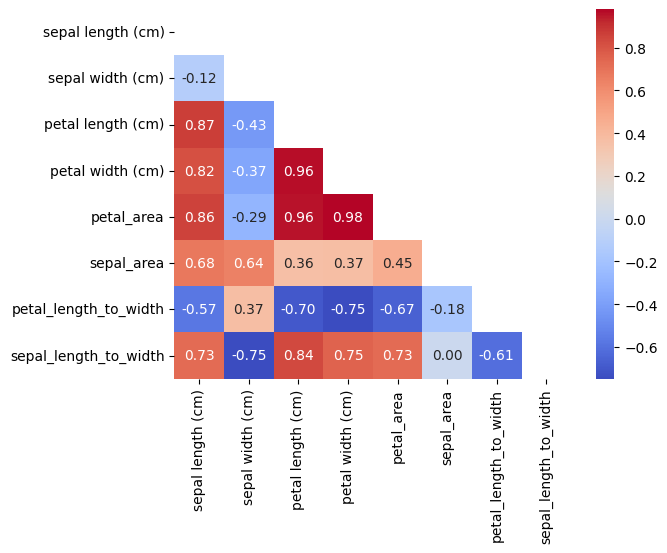

In [9]:
# Simple check for multicollinearity
corr = data.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')

#### Simple toy model to predict likelihood of setosa

In [10]:
# Create target variable for binary classification
data['is_setosa'] = (data['species'] == 'setosa').astype(int)

In [11]:
# Select features and target variable
X = data.drop(columns=['species', 'is_setosa'])
y = data['is_setosa']

In [12]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [14]:
# Evaluate model performance
y_probs = model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_probs)
auc_pr = average_precision_score(y_test, y_probs)

print(f"AUC-ROC: {auc_roc:.3f}")
print(f"AUC-PR:  {auc_pr:.3f}")

AUC-ROC: 1.000
AUC-PR:  1.000


In [15]:
# Grab coefficients for feature importance
feature_names = X_train.columns
coefficients = model.coef_[0]

In [16]:
# Create dataframe for feature importance
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': coefficients
})

In [17]:
# Sort by absolute value of importance
feature_importance['abs_coef'] = feature_importance['importance'].abs()
feature_importance = feature_importance.sort_values(by='abs_coef', ascending=False)
feature_importance

,feature,importance,abs_coef
4,petal_area,-1.275489,1.275489
2,petal length (cm),-0.797328,0.797328
6,petal_length_to_width,0.419320,0.419320
5,sepal_area,0.320158,0.320158
3,petal width (cm),-0.267312,0.267312
0,sepal length (cm),-0.266075,0.266075
7,sepal_length_to_width,-0.216091,0.216091
1,sepal width (cm),0.187982,0.187982
